<center>
<img src="https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/img/this_is_data_anal.png" width="200" height="200"><br>
</center>

# ch.05 데이터 종합 분석 예제

## 5.1 중고나라 휴대폰 거래가격 예측하기

이번 예제에서 사용하는 데이터는 https://www.data.go.kr/ 에서 제공하는 '네이버 중고나라' 데이터, 그리고 통신 3사 사이트에서 제공하는 휴대폰 공시가격 데이터를 기반으로 만들어진 것이다.

### step.1 탐색적 분석: 중고나라 데이터 분석하기

예제에서 사용할 중고나라 데이터셋은 다음과 같은 피처로 구성되어 있다.

- create_date : 판매(or 구매) 게시글이 올라온 시점
- price : 게시글 작성자가 제안한 휴대폰의 거래가격
- text : 게시글의 제목과 본문을 합친 텍스트 데이터
- phone_model : 휴대폰의 기종
- factory_price : 휴대폰의 공시가격
- maker : 휴대폰 제조사
- price_index : 판매 게시글이 올라온 시점에서의 휴대폰 물가 지수 데이터

- 중고나라 데이터셋 살펴보기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/jaeyoon89/python-data-analysis/data/used_mobile_phone.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


다음으로 개별 피처들을 탐색한다.

- 개별 피처 탐색하기 : date 피처 탐색

In [4]:
# create_date로 부터 '월'을 의미하는 month 정보를 피처로 추출한다.
df['month'] = df['create_date'].apply(lambda x : x[:7])

# 월별 거래 횟수를 계산하여 출력한다.
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

date 피처에서 월별 게시글의 개수를 살펴본 결과, 이 데이터는 2016년 10월과 2017년 3월에 집중적으로 수집된 데이터라는 것을 알 수 있다.
데이터의 개수를 일자별 시계열 그래프로도 나타내보자.

- 개별 피처 탐색하기: date 피처 탐색

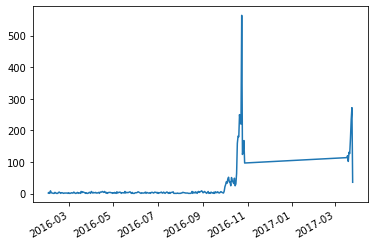

In [5]:
# 일별 거래 횟수를 계산하여 그래프로 출력한다.
df_day = pd.to_datetime(df['create_date'].apply(lambda x : x[:10])).value_counts()
df_day.plot()
plt.show()

그리고 아래와 같이 price 피처의 탐색을 통해 중고나라에서 거래되고 있는 중고 휴대폰의 가격이 어느 정도인지 살펴볼 수 있다. 그래프의 분포를 살펴보면, 대부분의 중고 휴대폰이 60만원 이하의 가격대를 형성하고 있고, 몇몇은 그 이상에도 거래되는 것을 볼 수 있다.

- 개별 피처 탐색하기 : price 피처 탐색


<AxesSubplot:>

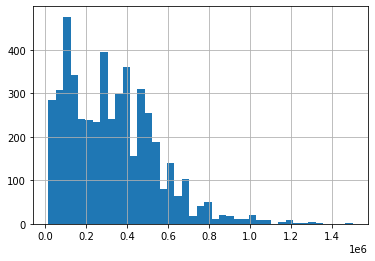

In [8]:
# 가격의 분포를 그래프로 탐색한다.
df['price'].hist(bins="auto")